In [17]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [8]:
neandertal_data = "/Users/veronikaaksinina/Documents/bioinf_sem_26/Homo_sapiens_neanderthalensis_mitochondrion.fasta"
human_data = "/Users/veronikaaksinina/Documents/bioinf_sem_26/Homo_sapiens_mitochondrion.fasta"

In [9]:
neandertal_seq = str(SeqIO.read(neandertal_data, "fasta").seq)
human_seq =  str(SeqIO.read(human_data, "fasta").seq)

In [13]:
def find_matches(neandertal_seq, human_data, min_length=15):
    matches = []
    for i in range(len(neandertal_seq)):
        for j in range(len(human_seq)):
            length = 0
            while ((i + length < len(neandertal_seq)) and 
            (j + length < len(human_seq)) and 
            (neandertal_seq[i + length] == human_seq[j+length])):
                length += 1
                if length > min_length:
                    right_ok = ((i + length == len(neandertal_seq)) or 
                                (j + length == len(human_seq)) or 
                                 (neandertal_seq[i+length] != human_seq[j+length]))
                    left_ok = (i == 0 or j == 0 or neandertal_seq[i-1] != human_seq[j-1])
                    if right_ok and left_ok:
                        matches.append((i, j, length))
    return matches

In [22]:
matches_10 = find_matches(neandertal_seq, human_seq, min_length=10)

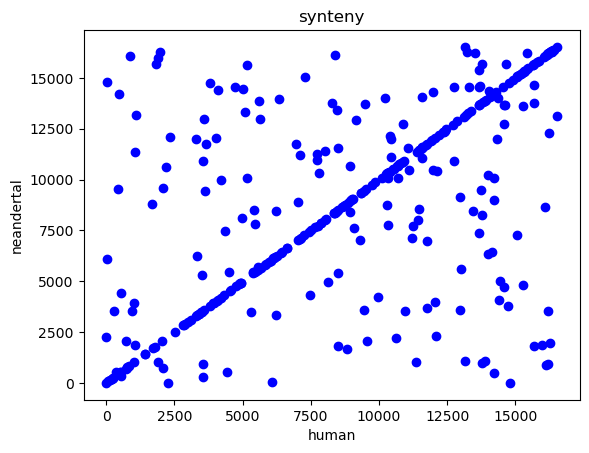

In [24]:
for match_10 in matches_10:
    plt.scatter(match_10[1], match_10[0], c='b')
plt.xlabel('human')
plt.ylabel('neandertal')
plt.title('synteny')
plt.show()

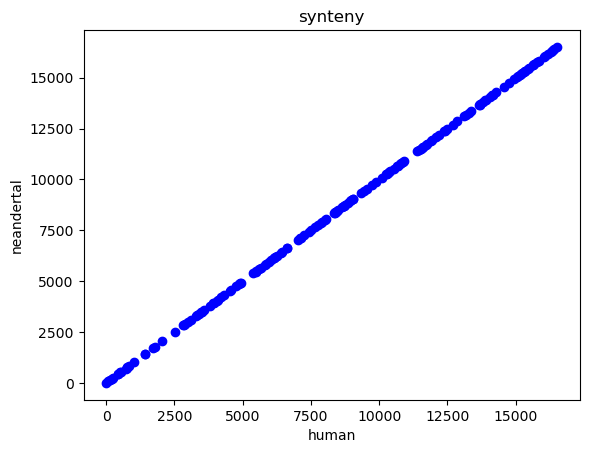

In [25]:
matches_15 = find_matches(neandertal_seq, human_seq, min_length=15)
for match_15 in matches_15:
    plt.scatter(match_15[1], match_15[0], c='b')
plt.xlabel('human')
plt.ylabel('neandertal')
plt.title('synteny')
plt.show()

## Вывод:    
Все точки легли строго на диагональ, это означает, что крупных структурных перестроек: инверсий, делеций или дупликаций между митохондриальными геномами человека и неандертальца не наблюдается, они устроены одинаково. 

Наблюдаемый разброс при низком пороге не противоречит выводу об отсутствии крупномасштабных структурных вариаций, а отражает молекулярно-генетические особенности организации митохондриальной ДНК, в частности, наличие коротких повторяющихся мотивов.